In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io as sio
from collections import Counter

# TODO: Set up requirements.txt correctly

In [2]:
# Load the Caltech Silouttes dataset
mat_16 = sio.loadmat('data/caltech101_silhouettes_16.mat')
mat_28 = sio.loadmat('data/caltech101_silhouettes_28.mat')

[  1   1   1 ... 101 101 101]
number of images:  8641
number of labels:  8641
Label occurrences: Counter({1: 798, 5: 798, 2: 435, 3: 435, 95: 235, 4: 200, 13: 128, 20: 123, 56: 114, 24: 107, 48: 100, 47: 99, 14: 98, 17: 91, 51: 88, 64: 87, 55: 86, 87: 86, 93: 86, 16: 85, 40: 85, 82: 84, 91: 84, 76: 82, 52: 80, 58: 78, 59: 78, 66: 76, 36: 75, 94: 75, 27: 73, 28: 70, 35: 68, 26: 67, 42: 67, 32: 66, 61: 66, 34: 65, 37: 64, 39: 64, 54: 64, 85: 64, 89: 64, 41: 63, 80: 63, 23: 62, 57: 61, 101: 60, 22: 59, 77: 59, 88: 59, 97: 59, 75: 57, 83: 57, 99: 56, 6: 55, 67: 55, 10: 54, 31: 54, 50: 54, 38: 53, 73: 53, 30: 51, 46: 51, 29: 50, 78: 49, 92: 49, 18: 47, 21: 47, 25: 47, 70: 47, 11: 46, 9: 45, 43: 45, 72: 45, 86: 45, 15: 43, 19: 43, 33: 43, 62: 43, 7: 42, 8: 42, 49: 42, 60: 41, 63: 40, 79: 40, 69: 39, 81: 39, 71: 38, 100: 38, 96: 37, 68: 35, 84: 35, 90: 35, 44: 34, 45: 34, 74: 34, 98: 34, 12: 32, 65: 32, 53: 31})


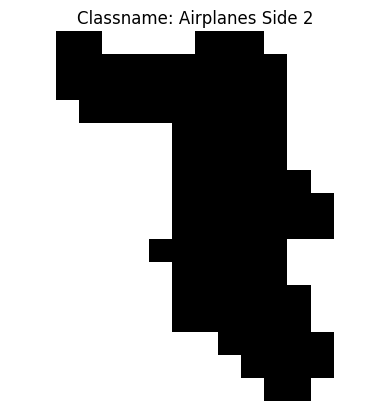

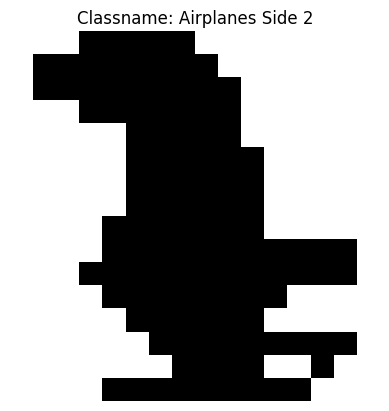

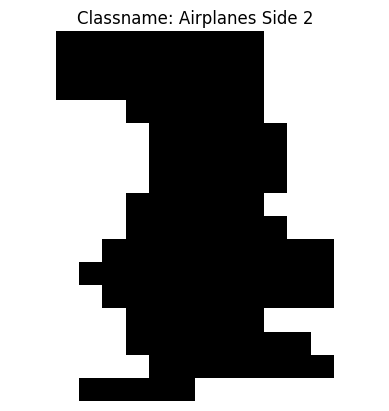

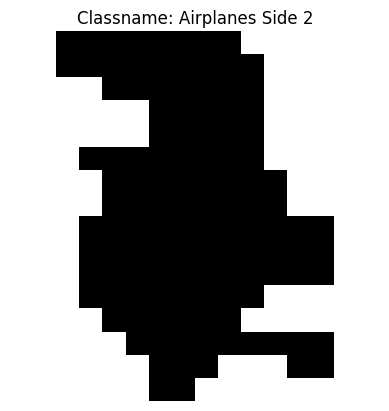

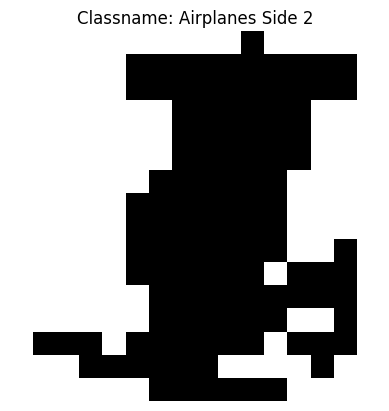

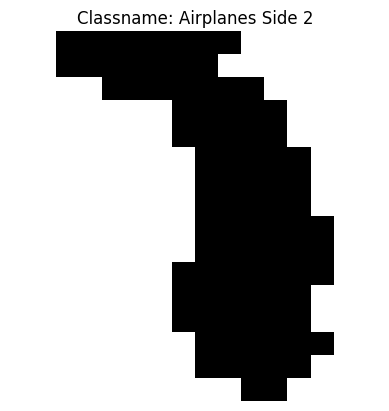

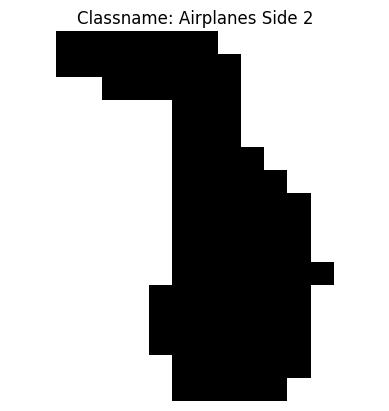

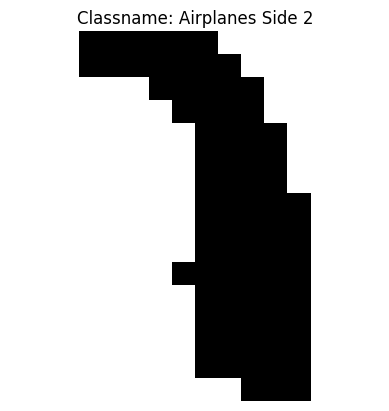

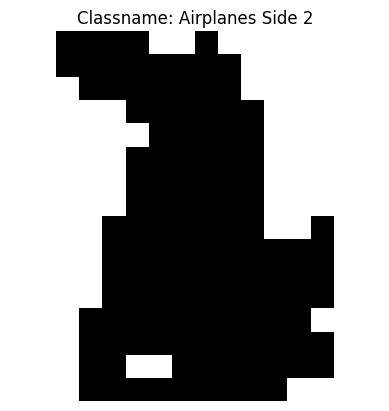

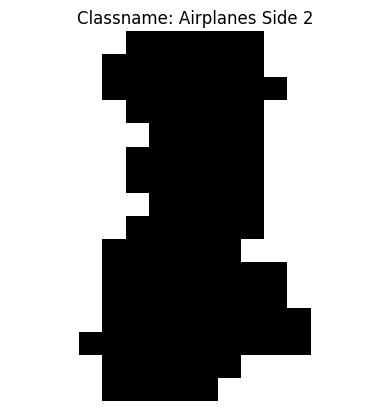

10
tensor([[ 1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1],
        [ 1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1],
        [ 1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1],
        [ 1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1],
        [ 1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1],
        [ 1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1],
        [ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1],
        [ 1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1],
        [ 1,  1,  1,  1,  1,  1,  1

In [3]:
classnames = []
selected_images = []
selected_labels = []

# print("keys: ", mat_16.keys())
# print(len(mat_16["classnames"][0]))

for i in range(len(mat_16["classnames"][0])):
    classnames.append(mat_16["classnames"][0][i][0])

images = mat_16['X']
labels = mat_16['Y']

print(labels[0])
print("number of images: ", len(images))
print("number of labels: ", len(labels[0]))

label_counts = Counter(labels[0])
print("Label occurrences:", label_counts)

# TODO: change idx to get images that aren't as overlapping
# one label, multiple images
# multiple labels, one label
# multiple labels, multiple images

idx = 0
# Display 3 images starting from idx
for i in range(idx, idx + 10):
    classname_idx = labels[0][i]
    image = images[i].reshape(16, 16)
    selected_images.append(torch.Tensor(image))
    selected_labels.append(classnames[classname_idx - 1])
    plt.imshow(image, cmap='gray')
    plt.title(f"Classname: {classnames[classname_idx - 1]}")
    plt.axis('off')
    plt.show()
    
print(len(selected_images))

binary_inputs = []

# Convert input image to binary patterns with values 1 and -1
for i in range(len(selected_images)):
    binary_input = torch.where(selected_images[i] > 0, torch.tensor(1), torch.tensor(-1))
    binary_input = binary_input.view(16, 16)
    binary_inputs.append(binary_input)

print(binary_inputs[0])
print(len(binary_inputs[0]))

number of selected images:  10


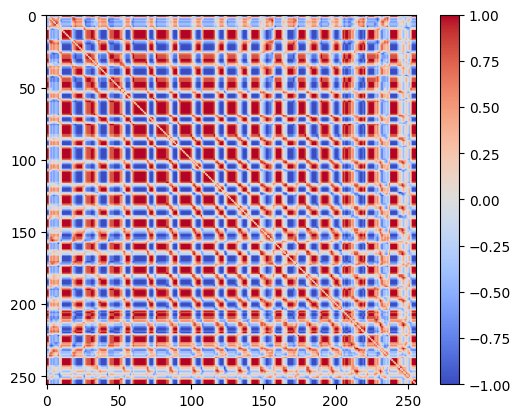

In [4]:
# From the selected images, build the weight matrix
print("number of selected images: ", len(selected_images))

num_neurons = len(binary_inputs[0])**2
weight = torch.zeros(num_neurons, num_neurons)
num_inputs = len(selected_images)

# Apply Hopfield weight matrix formula
for input in binary_inputs:
    flattened_binary_input = torch.flatten(input).unsqueeze(dim=1) # 784 by 1
    weight += torch.matmul(flattened_binary_input, flattened_binary_input.T)

# No recurrent weights
weight.fill_diagonal_(0)

# Normalize weight values
weight /= num_inputs

weight_map = plt.imshow(weight, cmap=cm.coolwarm)
plt.colorbar(weight_map)

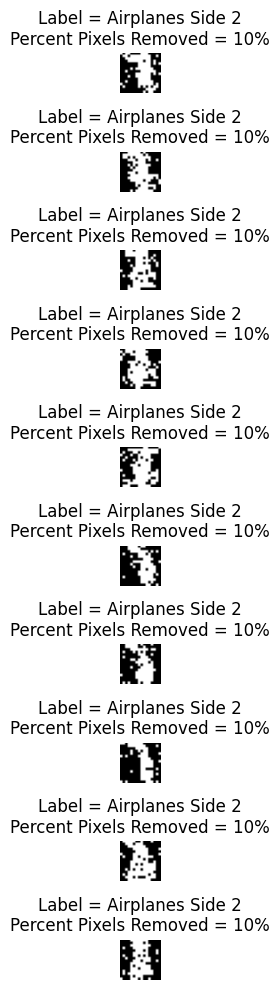

In [5]:
# Get noisy inputs
def flip_pixels(pattern, percent):
    pattern = torch.Tensor(pattern)
    num_pixels = pattern.numel()
    num_pixels_to_remove = int(num_pixels * percent / 100)
    indices_to_remove = np.random.choice(range(num_pixels), num_pixels_to_remove)
    noisy_pattern = pattern.clone()
    flattened_noisy_pattern = noisy_pattern.view(-1)
    flattened_noisy_pattern[indices_to_remove] *= -1
    
    return noisy_pattern

removed_percents = [10]
noisy_inputs = []

for i in range(len(binary_inputs)):
    for j in range(len(removed_percents)):
        noisy_inputs.append(flip_pixels(binary_inputs[i], removed_percents[j]))

# Plot the noisy inputs
fig, axs = plt.subplots(len(binary_inputs), len(removed_percents), figsize=(15, 10))

for i, binary_input in enumerate(binary_inputs):
    for j, percent in enumerate(removed_percents):
        classname_idx = labels[0][i]
        classname = classnames[classname_idx - 1]
        # Handle when there is only 1 removed percentage
        if len(removed_percents) == 1:
            axs[i].imshow(noisy_inputs[i].view(16, 16), cmap='binary')
            axs[i].set_title(f'Label = {classname}\nPercent Pixels Removed = {percent}%')
            axs[i].axis('off')
        # Handle when there is more than 1 removed percentage
        else:
            idx = i * len(removed_percents) + j
    
            axs[i, j].imshow(noisy_inputs[idx].view(16, 16), cmap='binary')
            axs[i, j].set_title(f'Label = {classname}\nPercent Pixels Removed = {percent}%')
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()


In [6]:
# Define the Hopfield network
class HopfieldNetwork():
    def __init__(self, num_neurons, weight, bias):
        self.num_neurons = num_neurons
        self.weight = weight
        self.bias = bias
        self.is_async_update = True
        
    def compute_energy(self, state) -> float:
        return -0.5 * torch.dot(state.T, torch.matmul(self.weight, state)) - torch.dot(self.bias, state)

    def update(self, input_pattern, num_iter) -> torch.Tensor:
        curr_state = input_pattern.clone()       # 784
        curr_state = curr_state.float()
        curr_energy = self.compute_energy(curr_state)
        
        # Asychronous update rule
        if self.is_async_update:
            for i in range(num_iter):       # Can test with different update orderings
                neuron_indices = list(range(self.num_neurons))
                np.random.shuffle(neuron_indices)
        
                for idx in neuron_indices:
                    new_state = torch.sign(torch.matmul(self.weight[idx], curr_state) - self.bias[idx])
                    curr_state[idx] = new_state
                
                # Check convergence condition
                new_energy = self.compute_energy(curr_state)
                
                if curr_energy == new_energy:
                    # print(f"Updated for {i + 1} iterations")
                    # print("curr energy:", curr_energy)
                    # print("new energy:", new_energy)
                    return curr_state
                    
                curr_energy = new_energy
        # Sychronous update rule
        else:
            for i in range(num_iter):
                new_state = torch.sign(torch.matmul(self.weight, curr_state) - self.bias)
                curr_state = new_state
                
                # Check convergence
                new_energy = self.compute_energy(curr_state)
                
                if curr_energy == new_energy:
                    # print(f"Updated for {i + 1} iterations")
                    # print("curr energy:", curr_energy)
                    # print("new energy:", new_energy)
                    return curr_state

                curr_energy = new_energy
        
        # print(f"Updated for {i + 1} iterations")
        # print("curr energy:", curr_energy)
        # print("new energy:", new_energy)
        
        return curr_state

    def retrieve(self, dim, binary_inputs, noisy_inputs, removed_percents, num_iter, async_update, pruning, **kwargs) -> None:
        self.pruning_method = None
        
        # If there is a valid pruning method, plot with that pruning
        if pruning is not None:
            self.pruning_method = next(iter(pruning))
            self.pruning_val = pruning[f'{self.pruning_method}']

        if self.pruning_method not in ["sparse", "magnitude"]:
            self.pruning_method = "retrieved"

        retrieved_str = ""
        plot_name = self.pruning_method
        
        if self.pruning_method == "sparse":
            retrieved_str = f"Sparsity = {self.pruning_val}"
            plot_name += str(self.pruning_val)
        elif self.pruning_method == "magnitude":
            retrieved_str = f"Magnitude = {self.pruning_val}"
            plot_name += str(self.pruning_val)
        
        update_str = "asychronous" if async_update else "sychronous"
        print(f"Retrieving patterns using the {update_str} update rule")
        
        fig, axs = plt.subplots(len(noisy_inputs), 3, figsize=(15, 10))
        retrieved_patterns = []
        
        for i in range(len(noisy_inputs)):
            # Printing message for 1 type of percent pixels removed
            if i == 0:
                axs[i, 0].set_title('Original Input', fontsize=13)
                axs[i, 1].set_title(f'Noisy Input\n Percent Pixels Flipped = {removed_percents[i % len(removed_percents)]}%',
                                    fontsize=13)
                axs[i, 2].set_title(f'Retrieved Pattern\n{retrieved_str}', fontsize=13)
            
            noisy_input = noisy_inputs[i]
            
            flattened_noisy_input = noisy_input.flatten()
            retrieved_input = self.update(flattened_noisy_input, num_iter)

            # Plot the original input
            axs[i, 0].imshow(binary_inputs[i // len(removed_percents)].view(dim, dim))
            axs[i, 0].axis('off')

            # Plot the noisy input
            axs[i, 1].imshow(noisy_input.view(dim, dim))
            axs[i, 1].axis('off')

            # Plot the retrieved pattern
            axs[i, 2].imshow(retrieved_input.view(dim, dim))
            axs[i, 2].axis('off')
            retrieved_patterns.append(retrieved_input)

        # plt.tight_layout()
        plt.savefig(f'./images/{plot_name}_fig.png')
        
        return retrieved_patterns

# Bias plays a big role for retrieval
# If too small, all the noisy inputs are aggregated
# If too big, the information from the noisy inputs are lost (values are all 0)

Retrieving patterns using the asychronous update rule


C:\Users\brian\AppData\Local\Temp\ipykernel_9328\115014610.py:10: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3641.)
  return -0.5 * torch.dot(state.T, torch.matmul(self.weight, state)) - torch.dot(self.bias, state)


[tensor([ 1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
         -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
         -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
          1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,
         -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
         -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
         -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.

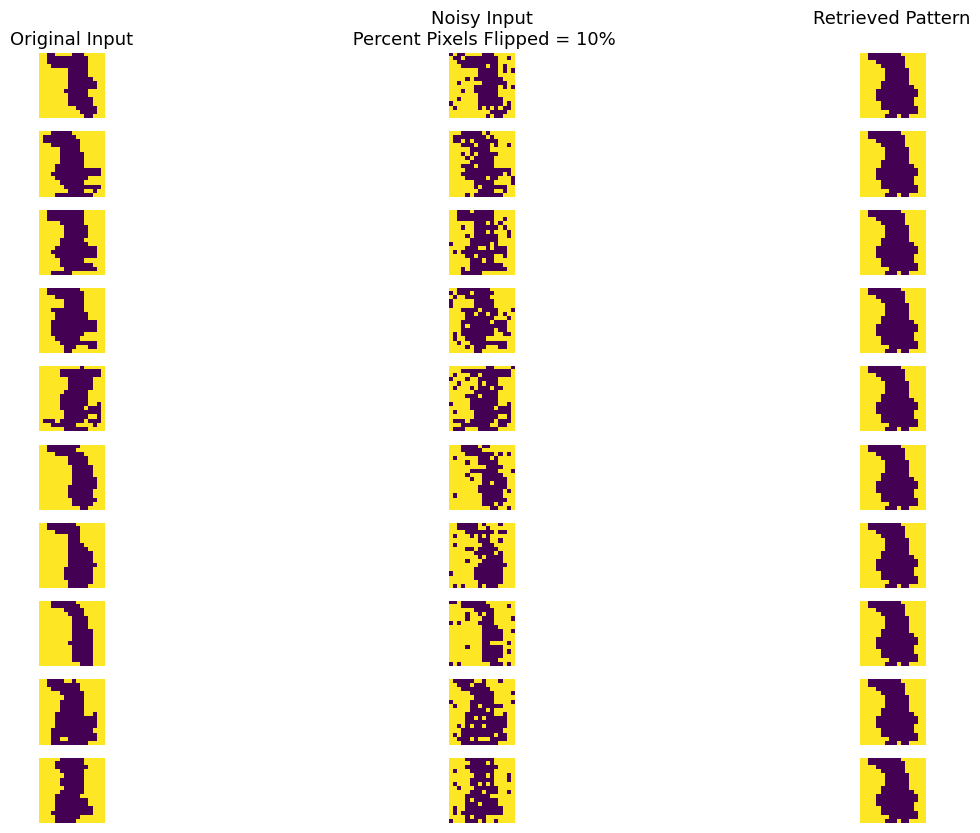

In [7]:
# Build the Hopfield Network on the dataset
bias = torch.ones(weight.size(0)).float() * 15
model = HopfieldNetwork(num_neurons, weight, bias)

dim = 16
num_iterations = 10
async_update = True
pruning_method = None

model.retrieve(dim, selected_images, noisy_inputs, removed_percents, num_iterations, async_update, pruning_method)

Running trial with a sparsity of 25
Unique values in the weight matrix: [-1.0, -0.800000011920929, -0.6000000238418579, -0.4000000059604645, -0.20000000298023224, 0.0, 0.20000000298023224, 0.4000000059604645, 0.6000000238418579, 0.800000011920929, 1.0]
Retrieving patterns using the asychronous update rule


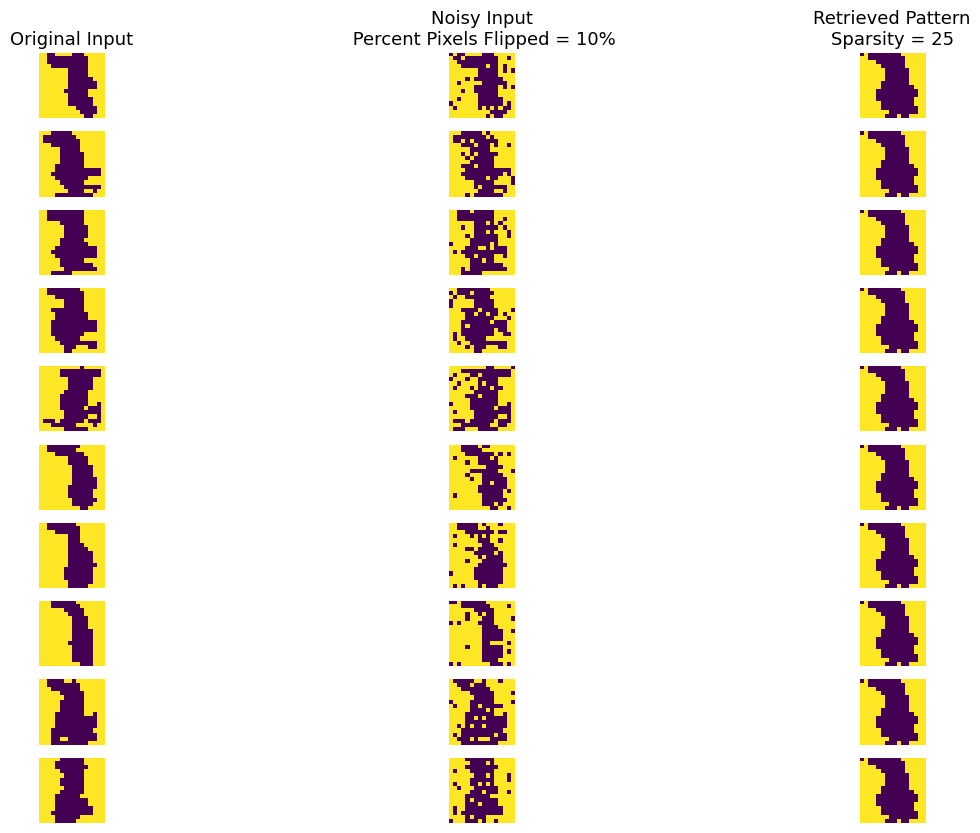

In [8]:
# Sparse pruning
def sparse_pruning(weight_matrix, sparsity) -> torch.Tensor:
    """
    Apply sparse pruning the weight matrix a Hopfield network
    
    Args:
        weight_matrix (torch.Tensor): The weight matrix of the Hopfield network.
        sparsity (float): The desired sparsity level, a percentage between 0 and 100.
    
    Returns:
        torch.Tensor: The pruned weight matrix.
    """
    
    unique_values = torch.unique(weight_matrix).tolist()
    print("Unique values in the weight matrix:", unique_values)
    
    # Only prune the weights that are valid
    nonzero_indices = torch.nonzero(weight_matrix).flatten()
    
    if len(nonzero_indices) == 0:
        print("No weights to prune. No nonzero values.")
        return weight_matrix
    
    num_nonzero_weights = len(nonzero_indices)
    num_pruned_weights = int(num_nonzero_weights * (sparsity / 100))
    
    if num_pruned_weights == 0:
        print("No weights to prune.")
        return weight_matrix
    
    indices_to_prune = np.random.choice(nonzero_indices, num_pruned_weights, replace=False)
    
    pruned_weight_matrix = weight_matrix.clone()
    flat_pruned_weight_mat = pruned_weight_matrix.flatten()
    flat_pruned_weight_mat[indices_to_prune] = 0
    pruned_weight_matrix = flat_pruned_weight_mat.view(weight_matrix.size(0), weight_matrix.size(0))

    return pruned_weight_matrix

def run_sparse_pruning(sparsity, bias) -> None:
    """
    Runs a trial with the sparsity level
    
    Args:
        sparsity (float): The desired sparsity level, a percentage between 0 and 100.
        bias (torch.Tensor): The bias for the Hopfield network.
        pruning_method (str): The method of pruning to be used.
    """
    pruned_weight = sparse_pruning(weight, sparsity)
    model = HopfieldNetwork(num_neurons, pruned_weight, bias)

    num_iterations = 10
    async_update = True
    pruning = {'sparse': sparsity}

    # TODO: need to make this adaptable to multiple sparsities
    sparse_pruned_pat = model.retrieve(dim, binary_inputs, noisy_inputs, removed_percents, num_iterations, async_update, pruning)
    
    return sparse_pruned_pat
    
def compare_sparse_pruning(sparsities, bias) -> None:
    """
    Compare the performance of the Hopfield network with different sparsity levels

    Args:
        sparsities (list): List of sparsity levels
    """
    for sparsity in sparsities:
        print(f"Running trial with a sparsity of {sparsity}")
        return run_sparse_pruning(sparsity, bias)

sparsities = [25]
sparse_pruned_pat = compare_sparse_pruning(sparsities, bias)

Running trial with a magnitude of 0.25
Retrieving patterns using the asychronous update rule


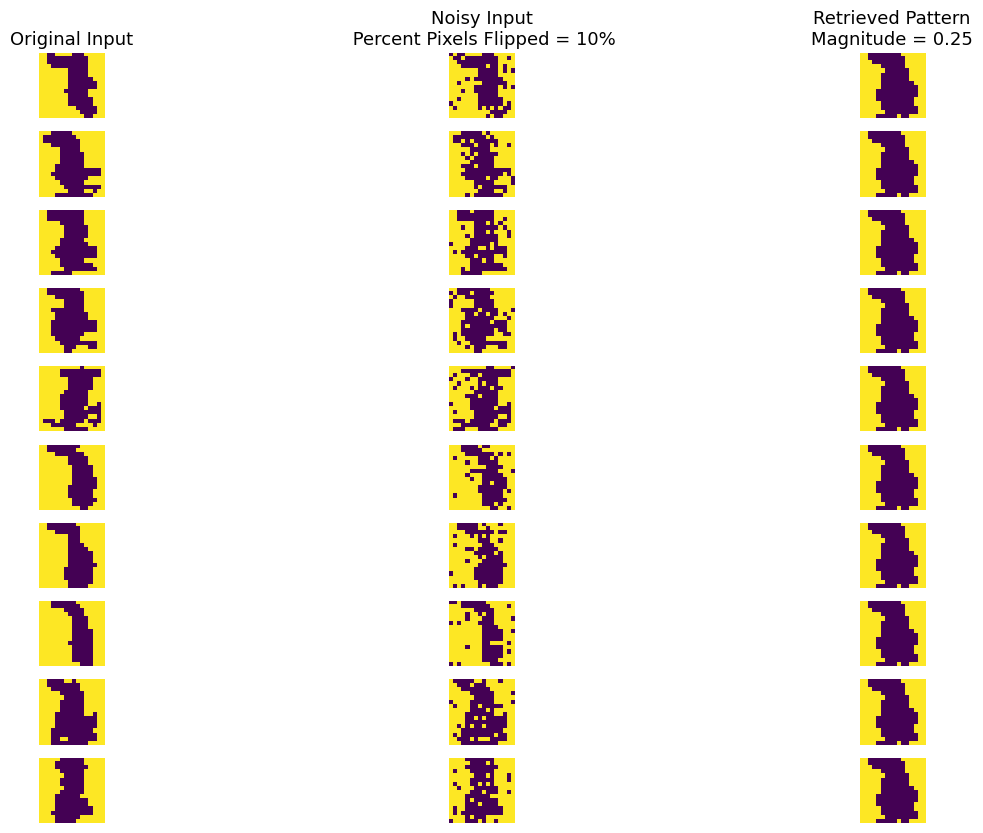

In [9]:
# Magnitude pruning
def magnitude_pruning(weight_matrix, threshold) -> torch.Tensor:
    """
    Apply sparse pruning the weight matrix a Hopfield network
    
    Args:
        weight_matrix (torch.Tensor): The weight matrix of the Hopfield network.
        threshold (float): The desired magnitude threshold to keep
    
    Returns:
        torch.Tensor: The pruned weight matrix.
    """
    
    weight_arr = weight_matrix.numpy()
    weight_arr[weight_arr < threshold] = -1
    pruned_weight_matrix = torch.tensor(weight_arr)
    
    return pruned_weight_matrix

def run_magnitude_parsing(magnitude, bias) -> None:
    """
    Runs a trial with a specified magnitude threshold.
    
    Args:
        threshold (float): The magnitude threshold. Weights above this threshold are retained.
    """
    pruned_weight = magnitude_pruning(weight, magnitude)
    model = HopfieldNetwork(num_neurons, pruned_weight, bias)

    num_iterations = 10
    async_update = True
    pruning = {'magnitude': magnitude}

    # TODO: need to make this adaptable to multiple magnitudes

    magnitude_pruned_pat = model.retrieve(dim, binary_inputs, noisy_inputs, removed_percents, num_iterations, async_update, pruning)
    
    return magnitude_pruned_pat
    
def compare_magnitude_pruning(magnitudes, bias) -> None:
    """
    Compare the performance of the Hopfield network with different magnitude levels

    Args:
        magnitudes (list): List of magnitudes
    """
    for magnitude in magnitudes:
        print(f"Running trial with a magnitude of {magnitude}")
        return run_magnitude_parsing(magnitude, bias)

magnitudes = [0.25]
magnitude_pruned_pat = compare_magnitude_pruning(magnitudes, bias)

In [10]:
# Measure pruning performance
def pruning_performance(orig_input, pruned_input) -> float:
    """
    Calculate the performance of the pruning method
    
    Args:
        orig_input (torch.Tensor): The original input pattern
        pruned_input (torch.Tensor): The pruned input pattern
    
    Returns:
        float: The performance of the pruning method.
    """
    
    num_pixels = orig_input.numel()
    num_incorrect_pixels = torch.sum(orig_input.flatten() != pruned_input)
    
    return 1 - (num_incorrect_pixels / num_pixels)

sparse_perf = []
magnitude_perf = []

for i in range(len(binary_inputs)):
    # print("Sparse pruning performance: ", pruning_performance(binary_inputs[i], sparse_pruned_pat[i]))
    # print("Magnitude pruning performance: ", pruning_performance(binary_inputs[i], magnitude_pruned_pat[i]))
    sparse_perf.append(pruning_performance(binary_inputs[i], sparse_pruned_pat[i]))
    magnitude_perf.append(pruning_performance(binary_inputs[i], magnitude_pruned_pat[i]))

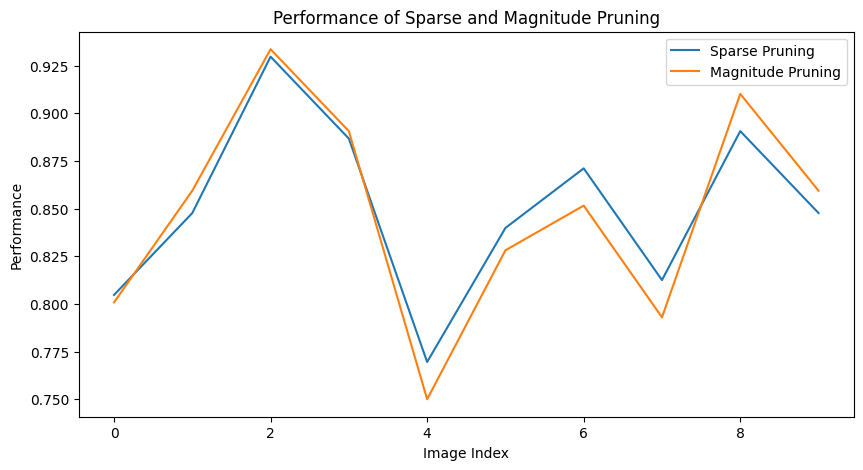

In [12]:
def plot_performance(sparse_perf, magnitude_perf) -> None:
    """
    Plot the performance of the pruning methods
    
    Args:
        sparse_perf (list): List of performance values for sparse pruning
        magnitude_perf (list): List of performance values for magnitude pruning
    """
    
    # TODO: haven't tested
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(range(len(sparse_perf)), sparse_perf, label='Sparse Pruning')
    ax.plot(range(len(magnitude_perf)), magnitude_perf, label='Magnitude Pruning')
    ax.set_xlabel('Image Index')
    ax.set_ylabel('Performance')
    ax.set_title('Performance of Sparse and Magnitude Pruning')
    ax.legend()
    plt.show()
    
plot_performance(sparse_perf, magnitude_perf)